**<center><font size=6>CS490: Machine Learning<br>Competition Project</font></center>**

<hr>

## Data Conditioning

Here we import files and prepare all the data for training. 
This data has missing data points, imbalanced categories and features that wil not be relevant to prediction. 
So, we must first condition the data to be usable for training. 


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
from mltools import dtree
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_validate

# load all of the data
X = pd.read_csv('TrainingData/Xtrain.csv')
Y = pd.read_csv('TrainingData/Ytrain.csv')
Xtest = pd.read_csv('TrainingData/Xtest.csv')

# Remove feature columns not relevant to training our models
Y_id = list(Y.columns.values)
idVal = list(Xtest.loc[:,'id'])
Xtrain, Ytrain = (X.iloc[:, 3:].astype(float), Y.iloc[:,1:].astype(float))
Xtest = Xtest.iloc[:, 3:].astype(float)

print(Y_id)
# Print numbers out normally
np.set_printoptions(suppress=True)

# count missing values. (missing values are identified by nan in numpy and pandas)
print("Original State (x):", np.count_nonzero(np.isnan(Xtrain)))
print("Original State (y):", np.count_nonzero(np.isnan(Ytrain)))
print("Original State (xtest):", np.count_nonzero(np.isnan(Xtest)))
print("\n")

Xnew = Xtrain
Ynew = Ytrain
XnewTest = Xtest

# Perform imputation with the median value of each group (group defined by area)
Xnew.fillna(X.groupby('Area').transform('median'))
Xnew.fillna(Xnew.iloc[:,2:].median().iloc[0], inplace=True)
XnewTest.fillna(Xnew.iloc[:,2:].median().iloc[0], inplace=True)


Ytrain['Area'] = X['Area']
Ynew = Ytrain.iloc[:,0:2].fillna(Ytrain.groupby('Area').transform('median'))
Ynew.fillna(Ynew.iloc[:,:].median().iloc[0], inplace=True)

Ynew[Ytrain.columns[2]] = Ytrain[Ytrain.columns[2]]
Ynew.loc[Ynew[Ynew.columns[0]] >= 50, Ynew.columns[2]].fillna(1, inplace=True) # NaNs = 1 when col0 > 50%
Ynew.loc[Ynew[Ynew.columns[1]] >= 50, Ynew.columns[2]].fillna(1, inplace=True) # NaNs = 1 when col1 > 50%
Ynew[Ynew.columns[2]].fillna(0, inplace=True)  # otherwise NaNs = 0

# Check to confirm we have replaced all missing values
print("Post-op (x)", np.count_nonzero(np.isnan(Xnew.iloc[:,2:].astype(float))))
print("Post-op (y)", np.count_nonzero(np.isnan(Ynew.iloc[:,:3])))
print("Post-op (xtest)", np.count_nonzero(np.isnan(Ynew.iloc[:,:3])))
print("\n")

# set up numpy arrays to perform SMOTE
Xtr, Ytr = (Xnew.to_numpy()[1:,3:], Ynew.to_numpy()[1:,2:3])
# Set up new SMOTE object
sm = SMOTE(random_state = 2)
Xtr_res, Ytr_res = sm.fit_resample(Xtr, Ytr.ravel())

# print frequencies to confirm we have the same number of data points classified in 0 and 1
(y_class, counts) = np.unique(Ytr_res, return_counts=True)
class_frequencies = np.asarray((y_class, counts)).T
print("Data Classification Points: \n", class_frequencies)
print("\n")

# Since we will be using Cross Validation, we do not need to split the data into training and validation
# We will just rename the variables for easy identification 
Xtrain = Xtr_res
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Ytrain = Ytr_res

Xtest = XnewTest.to_numpy()[:,3:]
XtrainL = Xnew.to_numpy()[1:,3:]
XtrainL = scaler.fit_transform(XtrainL)
YtrainL = Ynew.to_numpy()[1:,:2]

['id', 'Prevalence of severe food insecurity in the total population (percent) (3-year average)', 'Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)', 'Food Insecure Categorical']
Original State (x): 11232
Original State (y): 891
Original State (xtest): 986


Post-op (x) 0
Post-op (y) 0
Post-op (xtest) 0


Data Classification Points: 
 [[  0. 829.]
 [  1. 829.]]




# Decision Tree
I only chose this because it was already done.


Test and Validation Error:  0.0 and  0.025331724969843185

Test and Validation Error:  0.0 and  0.027744270205066344


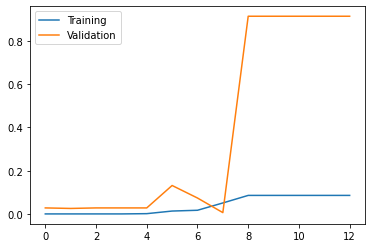

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [3]:
%matplotlib inline
[Xtr, Xva, Ytr, Yva] = ml.splitData(Xtrain, Ytrain, 0.50)

# First check a higher value to see what type of error is expected
# learn a decision tree with max depth 50
learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=100)

# compute and report the learner's training and validation error rates
learnTE = learner.err(Xtr, Ytr)
learnVE = learner.err(Xva, Yva)
print("\nTest and Validation Error: ", learnTE, "and ", learnVE)

learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=25)
learnTE = learner.err(Xtr, Ytr)
learnVE = learner.err(Xva, Yva)
print("\nTest and Validation Error: ", learnTE, "and ", learnVE)

# Error seems to level off somewhere around depth of 20-25 so we will go with 25
# Now perform the same technique for minParent at maxDepth = 25

# TODO: learn a decision trees with maxParent ranging from 2^0 to 2^12, 
# increasing by powers of 2
array = [0,1,2,3,4,5,6,7,8,9,10,11,12]
i = 0
valA = np.zeros(13)
trainA = np.zeros(13)
for i in array:
    power = 2**i
    learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=50, minParent=power)
    valA[i] = learner.err(Xva, Yva)
    trainA[i] = learner.err(Xtr, Ytr)

# TODO: plot the training and validation error versus maxDepth
plt.plot(array, trainA, label='Training');
plt.plot(array, valA, label='Validation');
plt.legend()
plt.show()

# Choice of minParent is 5
# Now let's train the actual model we will be using with our full dataSets
learner1 = ml.dtree.treeClassify(Xtrain, Ytrain, maxDepth=25, minParent=5)

# Now let's get predictions
prediction1 = learner.predict(Xtest)

# It outputs a zero prediction for every class, just like the neural net without fine tuning
# the only two values to change on this are the depth and minParent
# so we want our model more simplistic so it can generalize a little better

# Linear Regression
This was chosen because of ease of implementation and training time.  Even with cross validation, the model is evaluated 
very fast.  Neither the decision tree or the regression model had enough nuance to fit the data as well as the neural net.  Also, changing the hyper-parameters was much more simple for the neural net.

In [9]:
def normalize(prediction):
    top = prediction - prediction.min()
    bot = prediction.max() - prediction.min()
    result = np.multiply(np.divide(top, bot), 100)
    return result

# Now we will make the linear regression models using sklearn
model = linear_model.LinearRegression()
cv_results = cross_validate(model, XtrainL, YtrainL[:,0], cv=5, scoring='neg_mean_squared_error')
print("Mean Squared Error metric: (5 fold)", cv_results['test_score'])

# try again with a higher number of folds to compare the results
model1 = linear_model.LinearRegression()
cv_results1 = cross_validate(model1, XtrainL, YtrainL[:,0], cv=10, scoring='neg_mean_squared_error')
print("Mean Squared Error metric: (10 fold)", cv_results1['test_score'])

# MSE decreases each fold
# started at 5 folds and increased to 10, 10 folds resulted in a lower mean squared error
# So, we will use 10 fold for the second target regression value

model2 = linear_model.LinearRegression()
cv_results2 = cross_validate(model2, XtrainL, YtrainL[:,1], cv=10, scoring='neg_mean_squared_error')
print("Mean Squared Error metric: (10 fold)", cv_results2['test_score'])

model1.fit(XtrainL, YtrainL[:,0])
model2.fit(XtrainL, YtrainL[:,1])

prediction2 = model1.predict(Xtest)
prediction3 = model2.predict(Xtest)

idVal = np.array(idVal).flatten()
prediction1 = np.array(prediction1).ravel()
prediction2 = np.array(prediction2).ravel()
prediction3 = np.array(prediction3).ravel()

prediction2 = normalize(prediction2)
prediction3 = normalize(prediction3)

pred = {Y_id[0]: idVal[:], Y_id[1]:prediction2, Y_id[2]:prediction3, Y_id[3]:prediction1}
predDF = pd.DataFrame(data=pred)
#predDF.to_csv('submission.csv', index=False)
display(predDF)

Mean Squared Error metric: (5 fold) [-1110.72166876  -101.80539957   -94.64206101   -58.39091711
  -151.64333452]
Mean Squared Error metric: (10 fold) [  -22.59850805 -2086.85408819  -110.31036839   -95.31011562
   -43.22062944  -143.69173849   -67.60435147   -40.64013011
  -245.47063055   -67.545486  ]
Mean Squared Error metric: (10 fold) [ -135.72668752 -4384.96723392  -250.89724487  -170.68823247
  -234.84618788  -357.30224735  -117.42916057  -128.16260796
  -438.05970313  -239.65742789]


,id,Prevalence of severe food insecurity in the total population (percent) (3-year average),Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average),Food Insecure Categorical
0,1617,38.783685,84.357291,-18628.218624
1,1308,42.682282,86.225127,-17170.682768
2,931,43.284907,85.481042,-16945.384410
3,476,77.410426,92.667613,-4187.162428
4,1724,78.314959,92.812140,-3848.992009
...,...,...,...,...
95,1065,43.211459,84.032369,-16972.844097
96,501,42.763307,83.209770,-17140.390617
97,1866,47.309343,84.818599,-15440.802181
98,1156,66.057253,89.396798,-8431.677927


# Neural Net

I will be attempting to implement a neural net as a classifier in this section.  This section is using the tensor flow package to make my life at least a little bit easier.  I am also going to test this method out using the playground tool to see the different effects that can be obtained from different neural net structures.

52/52 [==============================] - 0s 628us/step - loss: 0.2841 - accuracy: 0.8914
Test accuracy: 0.891435444355011
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


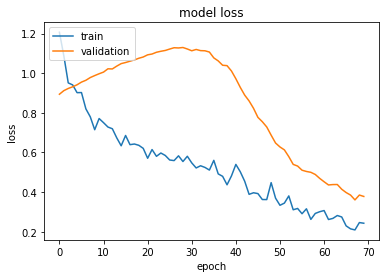

29/29 [==============================] - 0s 608us/step - loss: 0.8425 - mse: 344.0939
Test accuracy: 0.8424606323242188
dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


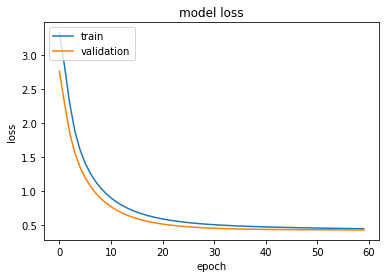

29/29 [==============================] - 0s 643us/step - loss: 0.6045 - mse: 175.1312
Test accuracy: 0.6044634580612183
dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


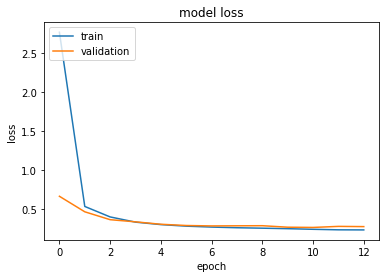

,id,Prevalence of severe food insecurity in the total population (percent) (3-year average),Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average),Food Insecure Categorical
0,1617,7.100917,9.324220,0.0
1,1308,9.964229,10.597324,1.0
2,931,10.705560,16.888723,1.0
3,476,20.958452,24.190948,0.0
4,1724,28.833208,24.236671,0.0
...,...,...,...,...
95,1065,6.086613,5.917655,0.0
96,501,11.488731,11.176489,0.0
97,1866,9.974998,15.298893,0.0
98,1156,22.678181,21.688839,0.0


In [5]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras,core
from sklearn.model_selection import train_test_split
import numpy as np

def createClassifyModel():
    # this sets the structure for the model
    # with the output of type sigmoid we leave our loss function options open
    # although, it seems to be standard practice to use binary cross entropy as the loss type
    model = keras.Sequential([
        keras.layers.Dense(2, input_dim=30, activation='elu'), #2
        keras.layers.Dense(2, activation='elu'), # 2
        keras.layers.Dense(2, activation='elu'), # 0
        keras.layers.Dense(2, activation='elu'), # 0
        keras.layers.Dense(2, activation='elu'), # 0
        keras.layers.Dense(1, activation='sigmoid')
    ])
    return model
    # return model so we ensure that we are using the same model
    # For the results I turned in, I used 'tanh' as the activation function and I was only using 2 hidden layers
    # the reason I did this is because the model was too accurate so none of the output predictions were being classified as
    # 1.0 class.  So, I made the model a little bit more vague.  But, for the graph's sake, I returned the model to a more
    # accurate means to produce the graph

def createLinearModel1():
    model = keras.Sequential([
        keras.layers.Dense(5, activation='elu'), # 40
        keras.layers.Dense(3, activation='elu'), # 0
        keras.layers.Dense(1, activation='linear')
    ])
    return model
    # We need 2 seperate models creation functions for the linear models.  This is to have custom structure to each of the 
    # neural nets.
    
def createLinearModel2():
    model = keras.Sequential([
        keras.layers.Dense(40, activation='relu'), # 40
        keras.layers.Dense(10, activation='relu'), # 40
        keras.layers.Dense(1, activation='linear')
    ])
    return model

def compileClassifyModel(model1, lr):
    # this sets our loss and the test metrics that we want to use
    # basically initializing the functions for the model
    model1.compile(optimizer=tf.keras.optimizers.Adam(lr), 
                  loss=tf.keras.losses.BinaryCrossentropy(), 
                  metrics=['accuracy'])
    return model1

def compileLinearModel1(model2, lr):
    model2.compile(optimizer=tf.keras.optimizers.SGD(lr), 
            loss=tf.keras.losses.MeanSquaredLogarithmicError(),  
            metrics = ['mse'])
    return model2

def compileLinearModel2(model3, lr):
    model3.compile(optimizer=tf.keras.optimizers.Adam(lr), 
            loss=tf.keras.losses.MeanSquaredLogarithmicError(),  
            metrics = ['mse'])
    return model3

def trainClassifyModel(model1, X_train1, Y_train1):
    history1 = model1.fit(X_train1, Y_train1, epochs=70, batch_size=1, 
        verbose=0, validation_split=0.33, steps_per_epoch=150, shuffle=True)
    #model1.fit(X_train1, Y_train1, epochs=26, batch_size=10, verbose=0, shuffle=True)
    return history1

def trainLinearModel1(model2, X_train2, Y_train2):
    history2 = model2.fit(X_train2, Y_train2, epochs=60, batch_size=1, verbose=0, validation_split=0.40)
    #model2.fit(X_train2, Y_train2, epochs=45, batch_size=1, verbose=0)
    return history2

def trainLinearModel2(model3, X_train3, Y_train3):
    history3 = model3.fit(X_train3, Y_train3, epochs=13, batch_size=1, verbose=0, validation_split=0.40)
    #model3.fit(X_train3, Y_train3, epochs=13, batch_size=1, verbose=0)
    return history3

def normalizeAndScale(predictions, predictModel):
    predictions = tf.convert_to_tensor(predictModel.predict(Xtest))
    predictions = tf.divide(
           tf.subtract(predictions, tf.reduce_min(predictions)), 
           tf.subtract(tf.reduce_max(predictions), tf.reduce_min(predictions)))
    predictions = tf.math.scalar_mul(100, predictions, name=None)
    return predictions

# same random seed for all models
# learning rate was figured out by trial and error, raising and lowering the value would impact the graphs and
# I used the change in graph to determine what works best
tf.random.set_seed(42)
learning_rate1 = 0.0001
learning_rate2 = 0.0001
learning_rate3 = 0.001
folds = 5

# Classifier Model - output is a sigmoid
newModel = createClassifyModel()
newModel = compileClassifyModel(newModel, learning_rate1)
# Pre-processing
history1 = trainClassifyModel(newModel, Xtrain, Ytrain)
#trainClassifyModel(newModel, Xtrain, Ytrain)
test_loss, test_acc = newModel.evaluate(Xtrain, Ytrain)
print('Test accuracy:', test_acc)
predictions1 = tf.round(newModel.predict(Xtest[:,:]))

# Plot the loss
print(history1.history.keys())
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Classifier Model - output is a sigmoid
newLinearModel = createLinearModel1()
newLinearModel = compileLinearModel1(newLinearModel, learning_rate2)
#X_tr,X_va,Y_tr,Y_va = ml.crossValidate(XtrainL,YtrainL[:,0:1],folds,fold)
# Pre-processing
history2 = trainLinearModel1(newLinearModel, XtrainL, YtrainL[:,0:1])
#trainLinearModel1(newLinearModel, XtrainL, YtrainL[:,0:1])
test_loss, test_acc = newLinearModel.evaluate(XtrainL, YtrainL)
print('Test accuracy:', test_loss)
predictions2 = newLinearModel.predict(Xtest[:,:])
predictions2 = normalizeAndScale(predictions2, newLinearModel)

# Plot the loss
print(history2.history.keys())
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Classifier Model 2 - output is a linear function
newLinearModel2 = createLinearModel2()
newLinearModel2 = compileLinearModel2(newLinearModel2, learning_rate3)
history3 = trainLinearModel2(newLinearModel2, XtrainL, YtrainL[:,1:2])
test_loss, test_acc = newLinearModel2.evaluate(XtrainL, YtrainL)
print('Test accuracy:', test_loss)
#trainLinearModel2(newLinearModel2, XtrainL, YtrainL[:,1:2])
predictions3 = newLinearModel2.predict(Xtest[:,:])
predictions3 = normalizeAndScale(predictions3, newLinearModel2)

# Plot the loss
print(history3.history.keys())
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Prepare the data to output to csv
idVal = np.array(idVal).flatten()
predictions1 = np.array(predictions1).ravel()
predictions2 = np.array(predictions2).ravel()
predictions3 = np.array(predictions3).ravel()

# Make a dataframe and output to csv
preds = {Y_id[0]: idVal[:], Y_id[1]:predictions2, Y_id[2]:predictions3, Y_id[3]:predictions1}
predDF = pd.DataFrame(data=preds)
predDF.to_csv('submission.csv', index=False)
display(predDF)

In [ ]:
# Project created by Christopher Pawlenok and Seth Falvey for CS490: Machine Learning.